In [1]:
memory.limit()
memory.limit(size=15500)
memory.limit()
library(rgdal)
library(raster)
library(randomForest)

[1] 16219

Warning message in memory.limit(size = 15500):
"no se puede disminuir el límite de la memoria: ignorado"

[1] 16219

[1] 16219

Loading required package: sp
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.0, released 2017/04/28
 Path to GDAL shared files: C:/Users/FM/Documents/R/win-library/3.4/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/FM/Documents/R/win-library/3.4/rgdal/proj
 Linking to sp version: 1.2-7 
Warning message:
"package 'randomForest' was built under R version 3.4.4"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [3]:
beginCluster()
IMG = brick(stack(as.list(list.files("D:/s2/R10M", full.names = T))))
endCluster()
b11=IMG[[1]]
b5=IMG[[2]]
b8=IMG[[3]]

8 cores detected, using 7


ERROR: Error in .rasterObjectFromFile(x, band = band, objecttype = "RasterLayer", : Cannot create a RasterLayer object from this file.


In [3]:
b11 
b5
b8
60/8

class       : RasterLayer 
dimensions  : 7861, 7695, 60490395  (nrow, ncol, ncell)
resolution  : 10, 10  (x, y)
extent      : 430600, 507550, 300960, 379570  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=18 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : B11 
values      : 0, 100  (min, max)


class       : RasterLayer 
dimensions  : 7861, 7695, 60490395  (nrow, ncol, ncell)
resolution  : 10, 10  (x, y)
extent      : 430600, 507550, 300960, 379570  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=18 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : B5 
values      : 0, 100  (min, max)


class       : RasterLayer 
dimensions  : 7861, 7695, 60490395  (nrow, ncol, ncell)
resolution  : 10, 10  (x, y)
extent      : 430600, 507550, 300960, 379570  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=18 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : B8 
values      : 0, 100  (min, max)


[1] 7.5

8 cores detected, using 7


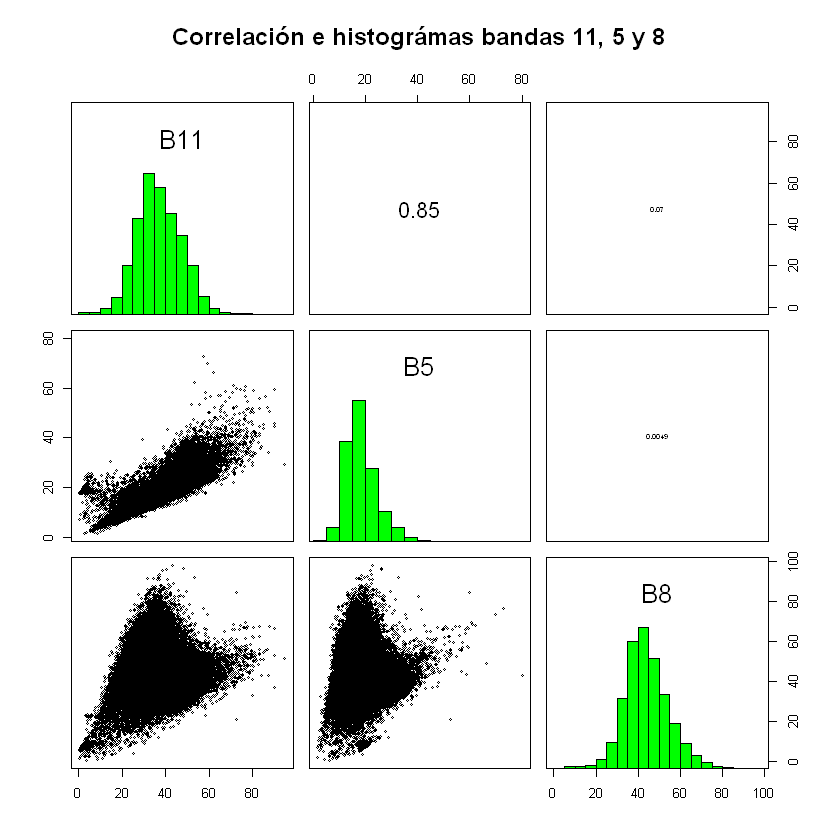

In [4]:
estadisticas = summary(IMG)
##write.csv(estadisticas, "D:/PR3/D/estadisticas.csv")
beginCluster()
cor_mat = layerStats(IMG, 'pearson', na.rm = T)
endCluster()
##write.csv(cor_mat, "D:/PR3/D/cor_mat.csv")
pairs(IMG,main="Correlación e histográmas bandas 11, 5 y 8", font.labels=1, label.pos=1)

In [5]:
trainingPoly = shapefile('D:/PR3/T.shp')

In [6]:
par(mfrow = c(1, 1))
trainingPoly@data
trainingPoly@data$clases
str(trainingPoly@data$clases)

,TIPO,AREA,clases
0,19,9.99,Rios
1,19,12.62,Rios
2,19,19.03,Rios
3,19,10.37,Rios
4,19,14.25,Rios
5,19,5.92,Rios
6,19,20.28,Rios
7,19,11.23,Rios
8,19,21.68,Rios
9,19,20.89,Rios


[1] "Rios"                              "Rios"                             
  [3] "Rios"                              "Rios"                             
  [5] "Rios"                              "Rios"                             
  [7] "Rios"                              "Rios"                             
  [9] "Rios"                              "Rios"                             
 [11] "Urbano continuo"                   "Urbano continuo"                  
 [13] "Urbano continuo"                   "Urbano continuo"                  
 [15] "Urbano continuo"                   "Urbano continuo"                  
 [17] "Urbano continuo"                   "Urbano continuo"                  
 [19] "Urbano continuo"                   "Urbano continuo"                  
 [21] "Urbano discontinuo"                "Urbano discontinuo"               
 [23] "Urbano discontinuo"                "Urbano discontinuo"               
 [25] "Urbano discontinuo"                "Urbano discontinuo"               
 [27] "Urbano discontinuo"                "Urbano discontinuo"               
 [29] "Urbano discontinuo"                "Urbano discontinuo"               
 [31] "Aeropuerto"                        "Aeropuerto"                       
 [33] "Aeropuerto"                        "Aeropuerto"                       
 [35] "Aeropuerto"                        "Aeropuerto"                       
 [37] "Suelo seco"                        "Suelo seco"                       
 [39] "Suelo seco"                        "Suelo seco"                       
 [41] "Suelo seco"                        "Suelo seco"                       
 [43] "Suelo seco"                        "Suelo seco"                       
 [45] "Suelo seco"                        "Suelo seco"                       
 [47] "Suelo humedo"                      "Suelo humedo"                     
 [49] "Suelo humedo"                      "Suelo humedo"                     
 [51] "Suelo humedo"                      "Suelo humedo"                     
 [53] "Suelo humedo"                      "Suelo humedo"                     
 [55] "Suelo humedo"                      "Arroz, vegetativo 1"              
 [57] "Arroz, vegetativo 1"               "Arroz, vegetativo 1"              
 [59] "Arroz, vegetativo 1"               "Arroz, vegetativo 1"              
 [61] "Arroz, vegetativo 1"               "Arroz, vegetativo 1"              
 [63] "Arroz, vegetativo 1"               "Arroz, vegetativo 2"              
 [65] "Arroz, vegetativo 2"               "Arroz, vegetativo 2"              
 [67] "Arroz, vegetativo 2"               "Arroz, vegetativo 2"              
 [69] "Arroz, vegetativo 2"               "Arroz, vegetativo 2"              
 [71] "Arroz, vegetativo 2"               "Arroz, vegetativo 2"              
 [73] "Arroz, vegetativo 2"               "Arroz, vegetativo 3"              
 [75] "Arroz, vegetativo 3"               "Arroz, vegetativo 3"              
 [77] "Arroz, vegetativo 3"               "Arroz, vegetativo 3"              
 [79] "Arroz, vegetativo 3"               "Arroz, vegetativo 3"              
 [81] "Arroz, vegetativo 3"               "Arroz, vegetativo 3"              
 [83] "Arroz, vegetativo 3"               "Cultivos permanentes y arbustivos"
 [85] "Cultivos permanentes y arbustivos" "Cultivos permanentes y arbustivos"
 [87] "Cultivos permanentes y arbustivos" "Cultivos permanentes y arbustivos"
 [89] "Cultivos permanentes y arbustivos" "Cultivos permanentes y arbustivos"
 [91] "Cultivos permanentes y arbustivos" "Cultivos permanentes y arbustivos"
 [93] "Cultivos permanentes y arbustivos" "Pasto limpio"                     
 [95] "Pasto limpio"                      "Pasto limpio"                     
 [97] "Pasto limpio"                      "Pasto limpio"                     
 [99] "Pasto limpio"                      "Pasto limpio"                     
[101] "Pasto limpio"                      "Pasto limpio"                     
[103] "Pasto limpio"    

 chr [1:295] "Rios" "Rios" "Rios" "Rios" "Rios" "Rios" "Rios" "Rios" "Rios" ...


In [7]:
trainingPoly@data$Code = as.numeric(trainingPoly@data$TIPO)
trainingPoly@data

,TIPO,AREA,clases,Code
0,19,9.99,Rios,19
1,19,12.62,Rios,19
2,19,19.03,Rios,19
3,19,10.37,Rios,19
4,19,14.25,Rios,19
5,19,5.92,Rios,19
6,19,20.28,Rios,19
7,19,11.23,Rios,19
8,19,21.68,Rios,19
9,19,20.89,Rios,19


In [8]:
beginCluster()
classes = rasterize(trainingPoly,IMG, field='Code')
endCluster()

8 cores detected, using 7


In [9]:
beginCluster()
covmasked = mask(IMG, classes)
endCluster()

8 cores detected, using 7


In [10]:
covmasked

class       : RasterBrick 
dimensions  : 7861, 7695, 60490395, 3  (nrow, ncol, ncell, nlayers)
resolution  : 10, 10  (x, y)
extent      : 430600, 507550, 300960, 379570  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=18 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       :       B11,        B5,        B8 
min values  : 0.3992680, 1.8768888, 0.5208334 
max values  :  99.95010,  99.49101,  99.93490 


In [11]:
names(classes) = "class"
beginCluster()
trainingbrick = addLayer(covmasked, classes)
endCluster()

8 cores detected, using 7


In [12]:
trainingbrick

class       : RasterStack 
dimensions  : 7861, 7695, 60490395, 4  (nrow, ncol, ncell, nlayers)
resolution  : 10, 10  (x, y)
extent      : 430600, 507550, 300960, 379570  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=18 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       :       B11,        B5,        B8,     class 
min values  : 0.3992680, 1.8768888, 0.5208334, 1.0000000 
max values  :  99.95010,  99.49101,  99.93490,  20.00000 


In [13]:
beginCluster()
valuetable = getValues(trainingbrick)
endCluster()

8 cores detected, using 7


In [14]:
beginCluster()
valuetable = na.omit(valuetable)
endCluster()

8 cores detected, using 7


In [15]:
valuetable

B11,B5,B8,class
4.258859,25.06760,23.68164,19
4.425220,24.82901,23.81185,19
4.425220,24.82901,23.77930,19
7.752454,23.74742,23.56771,19
6.737648,25.48115,24.02344,19
5.539844,25.65612,24.00716,19
5.539844,25.65612,23.81185,19
7.669273,24.57452,23.43750,19
5.539844,25.65612,24.16992,19
7.669273,24.57452,23.69792,19
